In [0]:
from keras.models import Model
from keras.layers import *
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [0]:
encoded_dim = 64

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu',)(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)

autoencoder = Model(input_img,decoded)

encoder = Model(input_img,encoded)

encoded_input = Input(shape=(encoded_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input,decoder_layer(encoded_input))


In [0]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [0]:
(x_train,_),(x_test,_) = mnist.load_data()

In [0]:
x_train =x_train.astype('float32')/255.0
x_test =x_test.astype('float32')/255.0

In [0]:
x_train = x_train.reshape((len(x_train),(np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test),(np.prod(x_test.shape[1:]))))

In [27]:
x_train.shape

(60000, 784)

In [28]:
x_test.shape

(10000, 784)

In [29]:
autoencoder.fit(x_train,x_train,batch_size=256,epochs=50,shuffle=True,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.3494 - val_loss: 0.2671
Epoch 2/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.2564 - val_loss: 0.2420
Epoch 3/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.2303 - val_loss: 0.2169
Epoch 4/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.2096 - val_loss: 0.2001
Epoch 5/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1957 - val_loss: 0.1886
Epoch 6/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1855 - val_loss: 0.1796
Epoch 7/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1773 - val_loss: 0.1722
Epoch 8/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1703 - val_loss: 0.1657
Epoch 9/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1642 - val_loss: 0.1599
Epoch

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

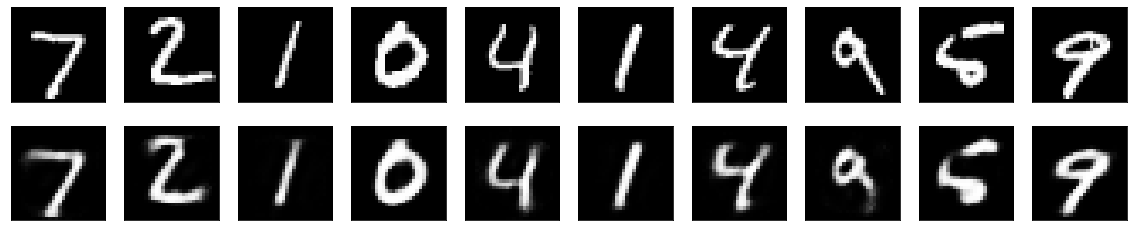

In [33]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
                               